In [58]:
import pandas as pd
import numpy as np
uri = 'Titanic_sc_data.csv'
df = pd.read_csv(uri)
df.head()

,Unnamed: 0,sex,pclass,who,alone,fare,sex_,pclass_,who_,alone_,fare_,survived_
0,0,male,3,adult,False,7.2500,1,2,0,0,18,0
1,1,female,1,adult,False,71.2833,0,0,0,0,207,1
2,2,female,3,adult,True,7.9250,0,2,0,1,41,1
3,3,female,1,adult,False,53.1000,0,0,0,0,189,1
4,4,male,3,adult,True,8.0500,1,2,0,1,43,0


In [59]:
col_select = ['sex_', 'pclass_', 'who_', 'alone_', 'fare_'] # เลือกคอลัมน์ทำ normalization
X = df[col_select]

In [60]:
y = df['survived_']

In [61]:
# แบ่งข้อมูล Train Test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state= 2020) # แบ่งเป็น X y test train จาก X y โดยที่ test_size = 0.2 (train_size=0.8)

In [62]:
## L1 - Lasso Regression
# L = (y_ - y)^2
from sklearn.linear_model import Lasso 
from time import time
from sklearn.model_selection import cross_val_score

In [63]:
model_Lasso = Lasso()
start = time() # เวลาเริ่มต้น train
model_Lasso.fit(X_train, y_train)
finish_Lasso = time() -start
print('{:.5f} sec'.format(finish_Lasso)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_Lasso, X, y, cv=10) # k=5
cvs_xgb = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.00200 sec
Cross val scores [-0.0773 -0.2895  0.1358  0.1012  0.077   0.1536  0.1706  0.154   0.1293
  0.1651]
mean 7.1976 %


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#ตรวจสอบจำนวนข้อมูลที่ Train, Test และดูข้อมูลที่ใช้ Test (จะเกิดการสุ่ม)
print('Total X: {}'.format(len(X)))
print('Total train: {}'.format(len(X_train)))
print('Total test: {}'.format(len(X_test)))
X_test
# ทำการ Test
y_predict = model_Lasso.predict(X_test)
y_pred = [round(i) for i in y_predict] # ใช้ round เพื่อปัด เศษ
y_true = y_test # กำหนดให้ yที่ทดสอบ คือ y_true

Total X: 889
Total train: 711
Total test: 178


In [65]:
#แยก ทำ target
class_names = ['unsurvived', 'survived']
# คำนวณรายงาน และ Confusion Matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print('Score : {:.3f}'.format(model_Lasso.score(X_test,y_test)))
print('Accuracy Score:',accuracy_score(y_test, y_pred).round(3))
# class_names no,yes จากก่อนหน้านี้
print(classification_report(y_true, y_pred, target_names=class_names))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Score : 0.087
Accuracy Score: 0.657
              precision    recall  f1-score   support

  unsurvived       0.65      0.90      0.76       104
    survived       0.70      0.31      0.43        74

    accuracy                           0.66       178
   macro avg       0.67      0.61      0.59       178
weighted avg       0.67      0.66      0.62       178

[[94 10]
 [51 23]]


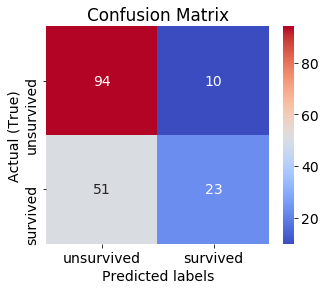

In [66]:
# ใช้ Seaborn Heat Map
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
plt.rcParams['figure.figsize'] = 5,4  # ขนาด
plt.rcParams.update({'font.size':14})  # ความสูงอักษร

cm = confusion_matrix(y_true, y_pred) # คำนวณค่า Confusion Matrix
# กราฟ heatmap เฉดสีออกโทน ฟ้า แดง
sns.heatmap(cm, annot=True, ax=ax, cmap="coolwarm")

y_targets = ['unsurvived', 'survived'] # Label กำกับ ถ้าไม่มีกำหนด จะแสดง 0 1

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual (True)');
ax.set_title('Confusion Matrix'); # title
ax.xaxis.set_ticklabels(y_targets) # label กำกับแกน x
ax.yaxis.set_ticklabels(y_targets) # label กำกับแกน y
plt.show() 

#ใช้ scikitplot สร้าง 
#import scikitplot as skplot
#skplot.metrics.plot_confusion_matrix(y_true, y_pred, normalize=False)
#plt.show()

In [67]:
model_Lasso.coef_

array([-0.        , -0.        ,  0.        , -0.        ,  0.00213652])

In [68]:
import pandas as pd
df_weight = pd.DataFrame(data = model_Lasso.coef_ ).rename(columns= {0:'weight'})
df_weight['features'] = X.columns
df_weight = df_weight.sort_values(by = 'weight', ascending = False)

In [69]:
df_weight

,weight,features
4,0.002137,fare_
0,-0.000000,sex_
1,-0.000000,pclass_
2,0.000000,who_
3,-0.000000,alone_


In [70]:
# ให้ความสำคัญกับ fare มากที่สุด

# Ridge Regression

In [71]:
from sklearn.linear_model import Ridge

In [72]:
model_Ridge = Ridge()
start = time() # เวลาเริ่มต้น train
model_Ridge.fit(X_train, y_train)
finish_Ridge = time() -start
print('{:.5f} sec'.format(finish_Lasso)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_Ridge, X, y, cv=10) # k=5
cvs_xgb = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.00200 sec
Cross val scores [0.3527 0.1444 0.3245 0.3947 0.3709 0.4129 0.344  0.2811 0.5102 0.3613]
mean 34.9668 %


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#ตรวจสอบจำนวนข้อมูลที่ Train, Test และดูข้อมูลที่ใช้ Test (จะเกิดการสุ่ม)
print('Total X: {}'.format(len(X)))
print('Total train: {}'.format(len(X_train)))
print('Total test: {}'.format(len(X_test)))
X_test
# ทำการ Test
y_predict = model_Ridge.predict(X_test)
y_pred = [round(i) for i in y_predict] # ใช้ round เพื่อปัด เศษ
y_true = y_test # กำหนดให้ yที่ทดสอบ คือ y_true

Total X: 889
Total train: 711
Total test: 178


In [74]:
#แยก ทำ target
class_names = ['unsurvived', 'survived']
# คำนวณรายงาน และ Confusion Matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print('Score : {:.3f}'.format(model_Lasso.score(X_test,y_test)))
print('Accuracy Score:',accuracy_score(y_test, y_pred).round(3))
# class_names no,yes จากก่อนหน้านี้
print(classification_report(y_true, y_pred, target_names=class_names))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Score : 0.087
Accuracy Score: 0.758
              precision    recall  f1-score   support

  unsurvived       0.79      0.81      0.80       104
    survived       0.72      0.69      0.70        74

    accuracy                           0.76       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.76      0.76      0.76       178

[[84 20]
 [23 51]]


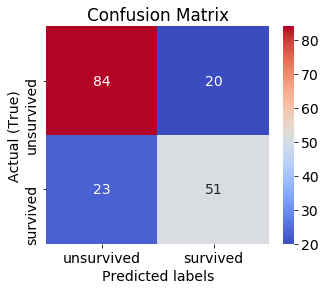

In [75]:
# ใช้ Seaborn Heat Map
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
plt.rcParams['figure.figsize'] = 5,4  # ขนาด
plt.rcParams.update({'font.size':14})  # ความสูงอักษร

cm = confusion_matrix(y_true, y_pred) # คำนวณค่า Confusion Matrix
# กราฟ heatmap เฉดสีออกโทน ฟ้า แดง
sns.heatmap(cm, annot=True, ax=ax, cmap="coolwarm")

y_targets = ['unsurvived', 'survived'] # Label กำกับ ถ้าไม่มีกำหนด จะแสดง 0 1

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual (True)');
ax.set_title('Confusion Matrix'); # title
ax.xaxis.set_ticklabels(y_targets) # label กำกับแกน x
ax.yaxis.set_ticklabels(y_targets) # label กำกับแกน y
plt.show() 

#ใช้ scikitplot สร้าง 
#import scikitplot as skplot
#skplot.metrics.plot_confusion_matrix(y_true, y_pred, normalize=False)
#plt.show()

In [76]:
# ทำนาย survive เก่งกว่า อันที่ แล้ว ข้อเสียคือ ได้ unsurvive น้อยกว่า

In [77]:
import pandas as pd
df_weight = pd.DataFrame(data = model_Ridge.coef_ ).rename(columns= {0:'weight'})
df_weight['features'] = X.columns
df_weight = df_weight.sort_values(by = 'weight', ascending = False)

In [78]:
df_weight

,weight,features
2,0.256467,who_
3,0.051381,alone_
4,-0.000156,fare_
1,-0.191563,pclass_
0,-0.526823,sex_


In [79]:
# ให้ความสำคัญ กับ who_, alone มากกว่า fare_

In [79]:
# การรวมกันของ 2 model ระหว่าง Lasso & Ridge Regression เรียก Elassticregression

# Elastic Net

In [80]:
from sklearn.linear_model import ElasticNet

In [81]:
model_EN =  ElasticNet()
start = time() # เวลาเริ่มต้น train
model_EN.fit(X_train, y_train)
finish_EN = time() -start
print('{:.5f} sec'.format(finish_EN)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_EN, X, y, cv=10) # k=5
cvs_xgb = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.00300 sec
Cross val scores [-0.0845 -0.3001  0.1383  0.1048  0.0761  0.157   0.1761  0.1567  0.1313
  0.1691]
mean 7.2475 %


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#ตรวจสอบจำนวนข้อมูลที่ Train, Test และดูข้อมูลที่ใช้ Test (จะเกิดการสุ่ม)
print('Total X: {}'.format(len(X)))
print('Total train: {}'.format(len(X_train)))
print('Total test: {}'.format(len(X_test)))
X_test
# ทำการ Test
y_predict = model_EN.predict(X_test)
y_pred = [round(i) for i in y_predict] # ใช้ round เพื่อปัด เศษ
y_true = y_test # กำหนดให้ yที่ทดสอบ คือ y_true

Total X: 889
Total train: 711
Total test: 178


In [83]:
#แยก ทำ target
class_names = ['unsurvived', 'survived']
# คำนวณรายงาน และ Confusion Matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print('Score : {:.3f}'.format(model_Lasso.score(X_test,y_test)))
print('Accuracy Score:',accuracy_score(y_test, y_pred).round(3))
# class_names no,yes จากก่อนหน้านี้
print(classification_report(y_true, y_pred, target_names=class_names))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Score : 0.087
Accuracy Score: 0.652
              precision    recall  f1-score   support

  unsurvived       0.65      0.89      0.75       104
    survived       0.68      0.31      0.43        74

    accuracy                           0.65       178
   macro avg       0.66      0.60      0.59       178
weighted avg       0.66      0.65      0.62       178

[[93 11]
 [51 23]]


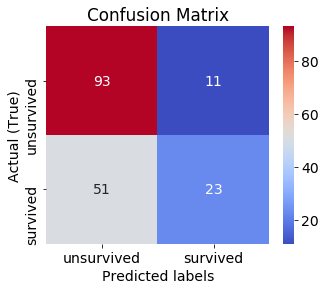

In [84]:
# ใช้ Seaborn Heat Map
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
plt.rcParams['figure.figsize'] = 5,4  # ขนาด
plt.rcParams.update({'font.size':14})  # ความสูงอักษร

cm = confusion_matrix(y_true, y_pred) # คำนวณค่า Confusion Matrix
# กราฟ heatmap เฉดสีออกโทน ฟ้า แดง
sns.heatmap(cm, annot=True, ax=ax, cmap="coolwarm")

y_targets = ['unsurvived', 'survived'] # Label กำกับ ถ้าไม่มีกำหนด จะแสดง 0 1

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual (True)');
ax.set_title('Confusion Matrix'); # title
ax.xaxis.set_ticklabels(y_targets) # label กำกับแกน x
ax.yaxis.set_ticklabels(y_targets) # label กำกับแกน y
plt.show() 

#ใช้ scikitplot สร้าง 
#import scikitplot as skplot
#skplot.metrics.plot_confusion_matrix(y_true, y_pred, normalize=False)
#plt.show()

In [ ]:
# ข้อดีคือ ทำนายผู้ไม่รอดชีวิตได้ เพิ่มขึ้น # ข้อเสีย คือ ทำนายผู้รอดชีวิตได้ต่ำลง

In [85]:
import pandas as pd
df_weight = pd.DataFrame(data = model_Ridge.coef_ ).rename(columns= {0:'weight'})
df_weight['features'] = X.columns
df_weight = df_weight.sort_values(by = 'weight', ascending = False)

In [86]:
df_weight

,weight,features
2,0.256467,who_
3,0.051381,alone_
4,-0.000156,fare_
1,-0.191563,pclass_
0,-0.526823,sex_
